# Madpy survey results

Let's check out the results of the Madpy survey! The survey responses have been deidentified and included in this repo as a csv named "responses-deidentified.csv". Here I'm reading this csv in with `pandas`. The `read_csv()` function returns a `DataFrame` object which I'm calling "results". Just to get a sense of what the data look like, I print the column names and first three rows with the `head()` method available on all `DataFrame` objects.

In [123]:
import pandas
results = pandas.read_csv('responses-deidentified.csv')
results.head(3)

,At what kind of facilities would you like to see the meetup?,At what skill level would you like to see events hosted?,How are you using Python?,How frequently would you be interested in attending MadPy meetings?,How would you prefer to communicate with the group online?,Is alcohol okay at meetups?,Is food okay at meetups?,What day(s) of the week work best for you?,What do you want to get out of a Madison Python meetup?,What format(s) of events would you like to see at MadPy?,What kind(s) of events would you like to see at MadPy?,What other tech meetups do you go to?,What time(s) of day work best for you?,Where in town works best for you to attend the meetup?
0,"Libraries, Offices","Introductory, Intermediate, Expert","Software (engineering/developing), SysAdmin/DevOps",Monthly,Email,Yes,Yes,"Monday, Tuesday",NaN,"Presentations, Hack Nights, Python Schooling, Social","Software (engineering/developing), Science (scientific & numeric...","Big Data Madison (https://www.meetup.com/BigDataMadison), Madiso...",After work hours (6pm - 9pm),"Far West, Near West, Downtown"
1,"Libraries, Bars, Restaurants, Offices, coffee shops, maker space...","Introductory, Intermediate, Expert","Software (engineering/developing), Science (scientific & numeric...","Monthly, Weekly","Email, madpy.com website could be useful to announce upcoming/pa...",Yes,Yes,"Wednesday, Thursday, Saturday, Sunday","Exposure to other python developers' methodologies, i.e. see how...","Presentations, Hack Nights, Python Schooling, q&a sessiosn, demo...","Software (engineering/developing), Science (scientific & numeric...",Data Science Madison (http://www.meetup.com/Data-Science-Madison...,"After work hours (6pm - 9pm), Night/bar time (9pm - 2am)","Near West, Downtown, East"
2,"Libraries, Bars, Offices","Intermediate, Expert",Science (scientific & numeric computing/data science),Monthly,"Slack channel, Meetup",Yes,Yes,"Monday, Wednesday, Thursday","I would like to become more proficient in using Python, as well ...","Presentations, Python Schooling, Social","Science (scientific & numeric computing/data science), Education...","MadJS (https://www.meetup.com/MadisonJS), Big Data Madison (http...",After work hours (6pm - 9pm),"Near West, Downtown"


## Renaming columns with (shorter) question ids

The header column is very verbose, including the complete question text. I want to replace these verbose column headers with something shorter, but I still want to keep the complete question text available for reference. The first thing I do is create a more concise map of questions to numbers. Then I can replace the verbose column headers with the shorter values contained in the map.

In [124]:
questions = pandas.DataFrame(dict(question=results.columns))
questions.insert(0, 'id', ['q{}'.format(i) for i in questions.index])

# Prevent output from truncating questions
pandas.set_option('display.max_colwidth', questions.question.apply(len).max().item() + 1)
questions

,id,question
0,q0,At what kind of facilities would you like to see the meetup?
1,q1,At what skill level would you like to see events hosted?
2,q2,How are you using Python?
3,q3,How frequently would you be interested in attending MadPy meetings?
4,q4,How would you prefer to communicate with the group online?
5,q5,Is alcohol okay at meetups?
6,q6,Is food okay at meetups?
7,q7,What day(s) of the week work best for you?
8,q8,What do you want to get out of a Madison Python meetup?
9,q9,What format(s) of events would you like to see at MadPy?


In [125]:
results = pandas.read_csv('responses-deidentified.csv')
results.columns = questions.id
results.head(3)

id,q0,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
0,"Libraries, Offices","Introductory, Intermediate, Expert","Software (engineering/developing), SysAdmin/DevOps",Monthly,Email,Yes,Yes,"Monday, Tuesday",NaN,"Presentations, Hack Nights, Python Schooling, Social","Software (engineering/developing), Science (scientific & numeric...","Big Data Madison (https://www.meetup.com/BigDataMadison), Madiso...",After work hours (6pm - 9pm),"Far West, Near West, Downtown"
1,"Libraries, Bars, Restaurants, Offices, coffee shops, maker space...","Introductory, Intermediate, Expert","Software (engineering/developing), Science (scientific & numeric...","Monthly, Weekly","Email, madpy.com website could be useful to announce upcoming/pa...",Yes,Yes,"Wednesday, Thursday, Saturday, Sunday","Exposure to other python developers' methodologies, i.e. see how...","Presentations, Hack Nights, Python Schooling, q&a sessiosn, demo...","Software (engineering/developing), Science (scientific & numeric...",Data Science Madison (http://www.meetup.com/Data-Science-Madison...,"After work hours (6pm - 9pm), Night/bar time (9pm - 2am)","Near West, Downtown, East"
2,"Libraries, Bars, Offices","Intermediate, Expert",Science (scientific & numeric computing/data science),Monthly,"Slack channel, Meetup",Yes,Yes,"Monday, Wednesday, Thursday","I would like to become more proficient in using Python, as well ...","Presentations, Python Schooling, Social","Science (scientific & numeric computing/data science), Education...","MadJS (https://www.meetup.com/MadisonJS), Big Data Madison (http...",After work hours (6pm - 9pm),"Near West, Downtown"


## Melting the data from wide to long

In [126]:
# Label participant
results.insert(0, 'person', ['p{}'.format(i) for i in results.index])
results.head(3)

id,person,q0,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
0,p0,"Libraries, Offices","Introductory, Intermediate, Expert","Software (engineering/developing), SysAdmin/DevOps",Monthly,Email,Yes,Yes,"Monday, Tuesday",NaN,"Presentations, Hack Nights, Python Schooling, Social","Software (engineering/developing), Science (scientific & numeric...","Big Data Madison (https://www.meetup.com/BigDataMadison), Madiso...",After work hours (6pm - 9pm),"Far West, Near West, Downtown"
1,p1,"Libraries, Bars, Restaurants, Offices, coffee shops, maker space...","Introductory, Intermediate, Expert","Software (engineering/developing), Science (scientific & numeric...","Monthly, Weekly","Email, madpy.com website could be useful to announce upcoming/pa...",Yes,Yes,"Wednesday, Thursday, Saturday, Sunday","Exposure to other python developers' methodologies, i.e. see how...","Presentations, Hack Nights, Python Schooling, q&a sessiosn, demo...","Software (engineering/developing), Science (scientific & numeric...",Data Science Madison (http://www.meetup.com/Data-Science-Madison...,"After work hours (6pm - 9pm), Night/bar time (9pm - 2am)","Near West, Downtown, East"
2,p2,"Libraries, Bars, Offices","Intermediate, Expert",Science (scientific & numeric computing/data science),Monthly,"Slack channel, Meetup",Yes,Yes,"Monday, Wednesday, Thursday","I would like to become more proficient in using Python, as well ...","Presentations, Python Schooling, Social","Science (scientific & numeric computing/data science), Education...","MadJS (https://www.meetup.com/MadisonJS), Big Data Madison (http...",After work hours (6pm - 9pm),"Near West, Downtown"


In [127]:
responses = pandas.melt(results, 'person', var_name='question', value_name='response_str')
responses.head(3)

,person,question,response_str
0,p0,q0,"Libraries, Offices"
1,p1,q0,"Libraries, Bars, Restaurants, Offices, coffee shops, maker space..."
2,p2,q0,"Libraries, Bars, Offices"


In [128]:
responses.sort_values(['person', 'question']).head(3)

,person,question,response_str
0,p0,q0,"Libraries, Offices"
80,p0,q1,"Introductory, Intermediate, Expert"
800,p0,q10,"Software (engineering/developing), Science (scientific & numeric..."


In [129]:
def melt_responses(response_strs):
    """Given a Series of response strings return a DataFrame with one response per row.
    
    An example response str is 'Libraries, Offices'. The resulting DataFrame would have
    two rows, one for each response item.
    """
    response_list = [split_response(response, ix)
                     for ix, response in response_strs.iteritems()]
    response_ser = pandas.concat(response_list)
    response_df = response_ser.reset_index(level='response_n')
    return response_df

def split_response(response_str, ix):
    try:
        responses = response_str.split(',')
    except AttributeError:
        responses = [response_str]
    
    
    index_pairs = zip([ix]*len(responses), range(len(responses)))
    multi_index = pandas.MultiIndex.from_tuples(list(index_pairs),
                                                names=['index', 'response_n'])        
    return pandas.Series(responses, index=multi_index, name='response')

melted_responses = melt_responses(responses.response_str)
melted_responses.head()

,response_n,response
index,,
0,0,Libraries
0,1,Offices
1,0,Libraries
1,1,Bars
1,2,Restaurants


In [130]:
responses = responses.merge(melted_responses, left_index=True, right_index=True)
responses.head()

,person,question,response_str,response_n,response
0,p0,q0,"Libraries, Offices",0,Libraries
0,p0,q0,"Libraries, Offices",1,Offices
1,p1,q0,"Libraries, Bars, Restaurants, Offices, coffee shops, maker space...",0,Libraries
1,p1,q0,"Libraries, Bars, Restaurants, Offices, coffee shops, maker space...",1,Bars
1,p1,q0,"Libraries, Bars, Restaurants, Offices, coffee shops, maker space...",2,Restaurants


In [131]:
del responses['response_str']
responses.set_index('question', inplace=True)
responses.head()

,person,response_n,response
question,,,
q0,p0,0,Libraries
q0,p0,1,Offices
q0,p1,0,Libraries
q0,p1,1,Bars
q0,p1,2,Restaurants
q0,p1,3,Offices
q0,p1,4,coffee shops
q0,p1,5,maker spaces; just about anywhere as long as it's comfortable
q0,p1,6,not too noisy/many distractions


In [153]:
%matplotlib inline
import seaborn

def plot_counts(question_id):
    seaborn.countplot(responses.ix[question_id, 'response'])

In [154]:
questions

,id,question
0,q0,At what kind of facilities would you like to see the meetup?
1,q1,At what skill level would you like to see events hosted?
2,q2,How are you using Python?
3,q3,How frequently would you be interested in attending MadPy meetings?
4,q4,How would you prefer to communicate with the group online?
5,q5,Is alcohol okay at meetups?
6,q6,Is food okay at meetups?
7,q7,What day(s) of the week work best for you?
8,q8,What do you want to get out of a Madison Python meetup?
9,q9,What format(s) of events would you like to see at MadPy?


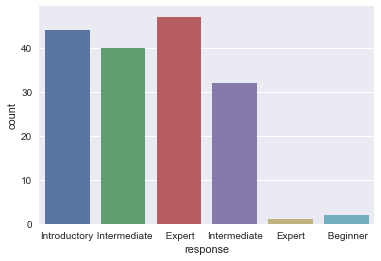

In [155]:
plot_counts('q1')

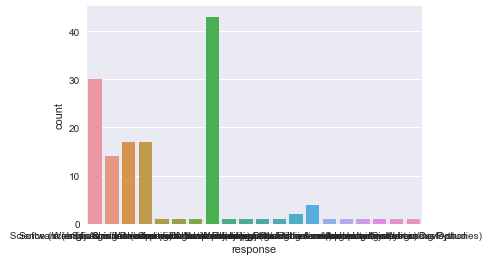

In [156]:
plot_counts('q2')

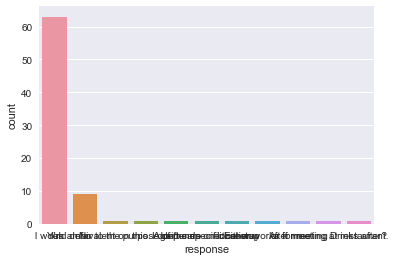

In [157]:
plot_counts('q3')

In [ ]:
plot_counts('q4')

In [ ]:
plot_counts('q5')

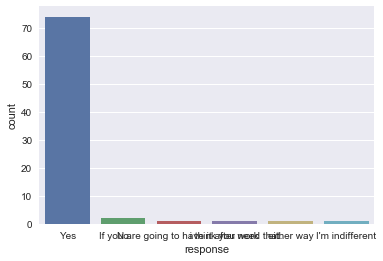

In [158]:
plot_counts('q6')

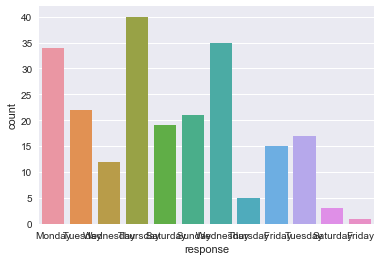

In [159]:
plot_counts('q7')

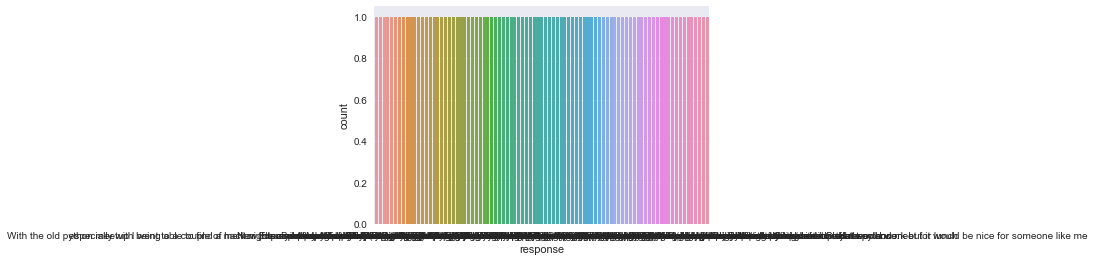

In [160]:
plot_counts('q8')

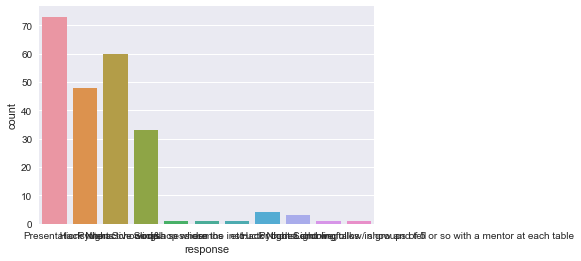

In [161]:
plot_counts('q9')

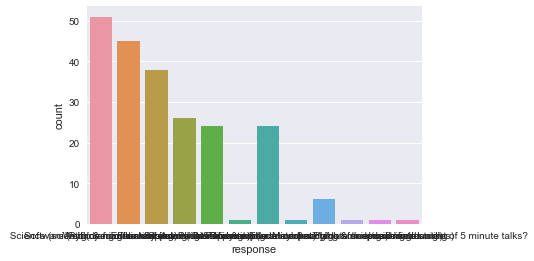

In [162]:
plot_counts('q10')

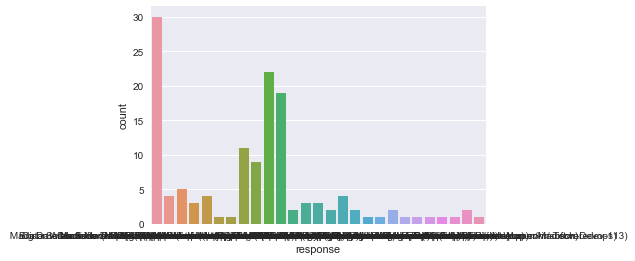

In [163]:
plot_counts('q11')

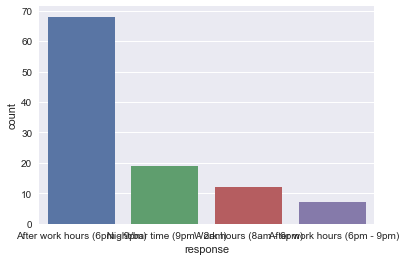

In [164]:
plot_counts('q12')

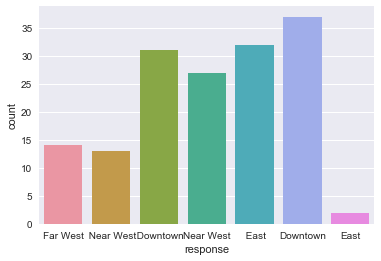

In [165]:
plot_counts('q13')